# 1.0 Data Understanding

### 1.1 Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt


import seaborn as sns
import os

sns.set(rc = {"figure.figsize":(10, 6)}) #graph size

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### 1.2 Load Data from Dataset

In [2]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### 1.3 Check missing values in each columns

In [3]:
df.shape

(1000000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### 1.4 Check duplication of record

In [5]:
df.duplicated().sum()

0

### 1.5 Show statistical properties of dataset

In [6]:
#check the skewness
df.describe().style.background_gradient(cmap = "plasma")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


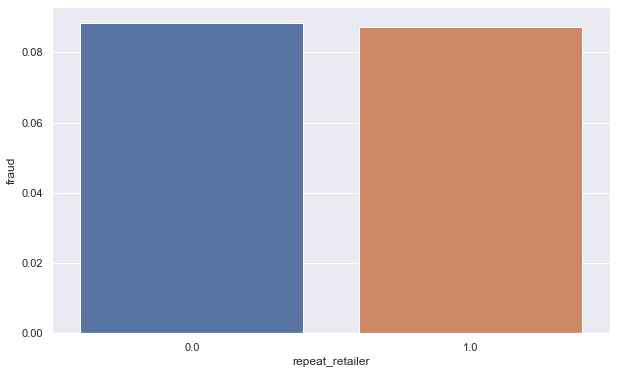

In [7]:
bar = df.groupby(by='repeat_retailer').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

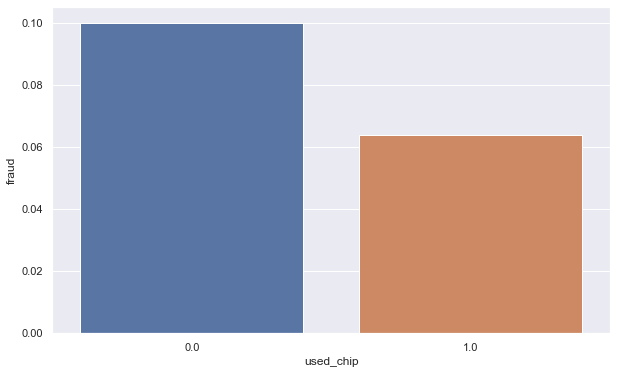

In [8]:
bar = df.groupby(by='used_chip').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

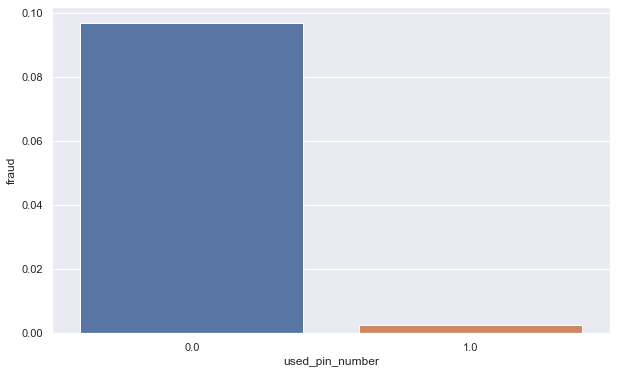

In [9]:
bar = df.groupby(by='used_pin_number').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

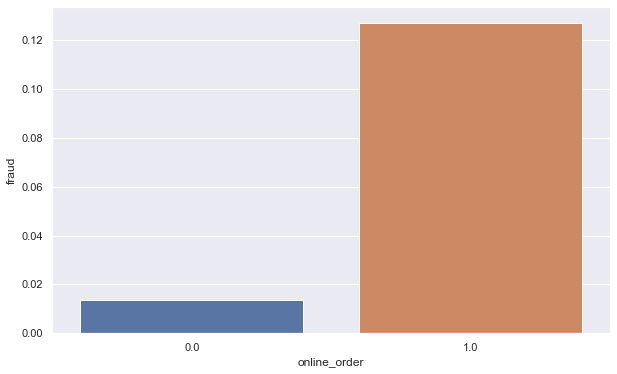

In [10]:
bar = df.groupby(by='online_order').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

##### Boxplot

<AxesSubplot:>

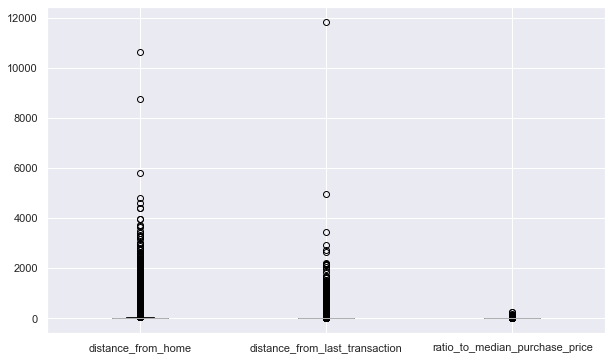

In [11]:
df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']].boxplot()

### 1.8 Correlation Heatmap

<AxesSubplot:>

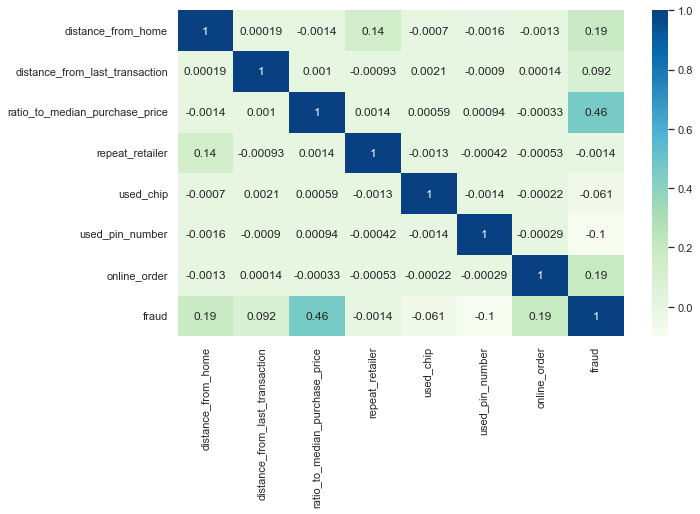

In [12]:
corr = df.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "GnBu")

### 1.9 Detect and Deal with Imbalanced Class Distribution

##### Class Distribution before Applying Resampling

fraud
0.0    912597
1.0     87403
dtype: int64

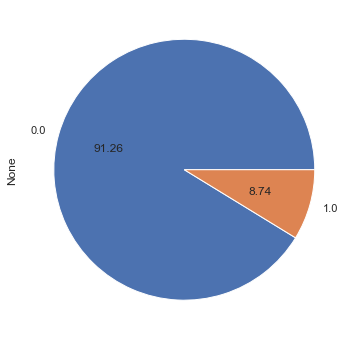

In [14]:
# Class distribution
# Real (class 0.0) meaning non-fraudulent transactions
# Fraud (class 1.0) meaning fraudulent transactions
df.value_counts("fraud").plot.pie(autopct = "%.2f")
df.value_counts("fraud")

##### Apply Resampling Technique (Undersampling)

In [15]:
real = df[df["fraud"] == 0]
fraud = df[df["fraud"] == 1]

# Resampling the original dataset with 87,403 datapoints for both classes
real_resample = real.sample(n = 87403, random_state = 123)
fraud_resample = fraud.sample(n = 87403, random_state = 123)

# Creating new dataset consisting of equal class occurence 
df0 = pd.concat([real_resample, fraud_resample], axis = 0)

##### Class Distribution After Applying Resampling

fraud
0.0    87403
1.0    87403
dtype: int64

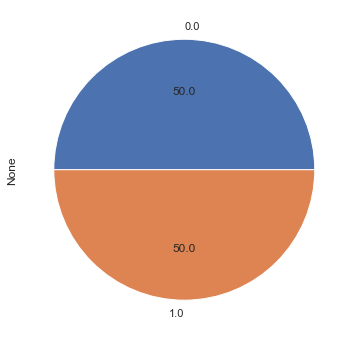

In [16]:
df0.value_counts("fraud").plot.pie(autopct = "%.1f")
df0.value_counts("fraud")

##### Variable Correlation After Applying Resampling

<AxesSubplot:>

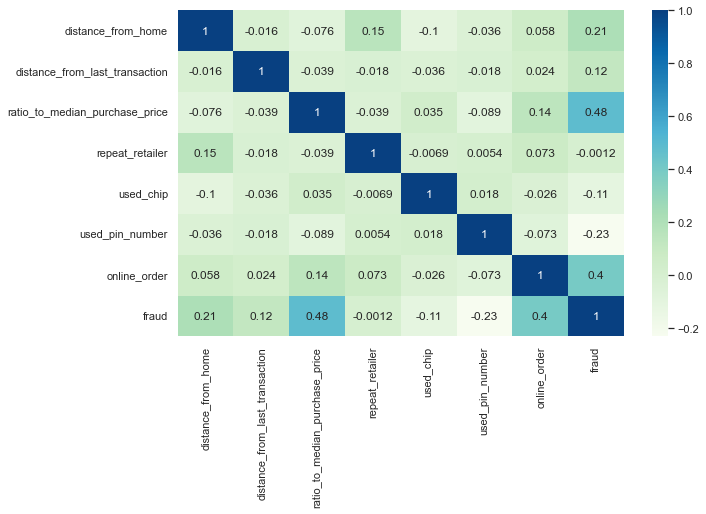

In [17]:
corr0 = df0.corr()

sns.heatmap(corr0, xticklabels = corr0.columns, yticklabels = corr0.columns, annot = True, cmap = "GnBu")

# 2.0 Data Preparation

### 2.1 Split Dataset into Feature and Class Variable

In [18]:
x = np.array(df0.drop(columns = "fraud"))
y = np.array(df0["fraud"])


### 2.2 Split into training set and testing set (80:20)

In [19]:
# Creating Train Test Split
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size = 0.2, random_state = 123, shuffle = True)

### 2.3 Feature Scaling

In [20]:
# Data scaling to produce good results
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

print(x_train)

[[1.32571211e-02 9.72345572e-06 1.82280862e-04 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.57914140e-03 2.41161592e-03 1.73506192e-02 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.85144372e-04 1.33082130e-04 5.56278065e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.27291722e-03 6.57520048e-05 1.78959522e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.36610707e-04 2.61885918e-04 1.26360717e-02 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.12636895e-04 1.84667355e-03 7.09755243e-03 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


# 3.0 Training the Models

### 3.1 Create and Fit the Models

### 3.1.1 K-Nearest Neighbours

In [21]:
# Preliminary definition of the classifier
knn = KNeighborsClassifier()
tuned_parameters = [{ 'n_neighbors':[1,2,3,4,5]}]

# CV setup cross validation
clf = GridSearchCV(estimator=knn,param_grid=tuned_parameters, cv=5, n_jobs=-1)

# Fit the training set
clf.fit(x, y)

# To show the best parameters and score
print('Best parameters:')
print(clf.best_params_)
print(clf.best_score_)

Best parameters:
{'n_neighbors': 1}
0.9737251572556088


In [22]:
# create our knn model
knn = KNeighborsClassifier(n_neighbors = clf.best_params_['n_neighbors'])
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

### 3.1.2 Decision Tree

In [23]:
# Preliminary definition of the classifier
dt = DecisionTreeClassifier()

# The parameter name that needs to be selected is followed by the value
tuned_parameters = [{ 'max_depth': [2,4,6,8,10,12],"criterion":["gini","entropy"]}]
clf = GridSearchCV(estimator = dt,param_grid = tuned_parameters, cv = 5, n_jobs = -1)
clf.fit(x, y)

# To show the best parameters and score
print('Best parameters:')
print(clf.best_params_)
print(clf.best_score_)


Best parameters:
{'criterion': 'gini', 'max_depth': 10}
0.9999027497589594


In [24]:
# create our dt model
# print(clf.best_params_['max_depth'])
dt = DecisionTreeClassifier(criterion=clf.best_params_['criterion'],max_depth=clf.best_params_['max_depth'])
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=10)

### 3.1.3 Random Forest

In [25]:
# Preliminary definition of the classifier
rf = RandomForestClassifier(random_state = 0)

# The parameter name that needs to be selected is followed by the value
tuned_parameters = [{ 'n_estimators':range(25,75,1),"criterion":["gini","entropy"]}]
clf = GridSearchCV(estimator = rf,param_grid = tuned_parameters, cv = 5, n_jobs = -1)
clf.fit(x, y)

# To show the best parameters and score
print('Best parameters:')
print(clf.best_params_)
print(clf.best_score_)


Best parameters:
{'criterion': 'entropy', 'n_estimators': 52}
0.9999599553788506


In [26]:
# create our rf model
rf = RandomForestClassifier(n_estimators= clf.best_params_['n_estimators'],criterion = clf.best_params_['criterion'], random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=52, random_state=0)

### 3.2 Predictions of Models


In [27]:
knn_pred_test = knn.predict(x_test)
dt_pred_test = dt.predict(x_test)
rf_pred_test = rf.predict(x_test)

# 4.0 Evaluation of Models

### 4.1 Testing Set Performance


In [28]:
# confusion matrix of KNN
confusion_matrix(y_test, knn_pred_test)

array([[17437,    65],
       [   29, 17431]], dtype=int64)

Text(84.5, 0.5, 'Actual')

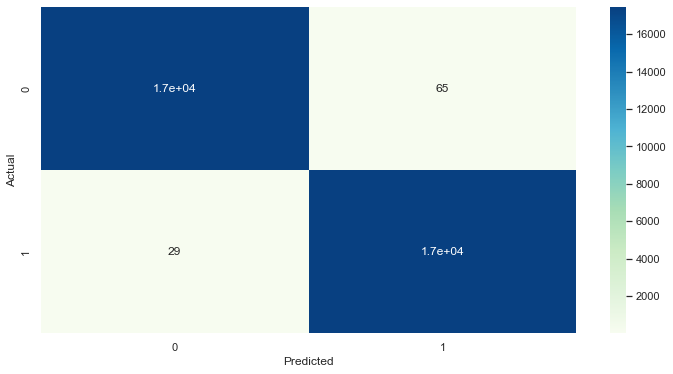

In [29]:
cm=confusion_matrix(y_test, knn_pred_test)
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "GnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [30]:
# confusion matrix of Decision Tree
confusion_matrix(y_test, dt_pred_test)

array([[17500,     2],
       [    0, 17460]], dtype=int64)

Text(84.5, 0.5, 'Actual')

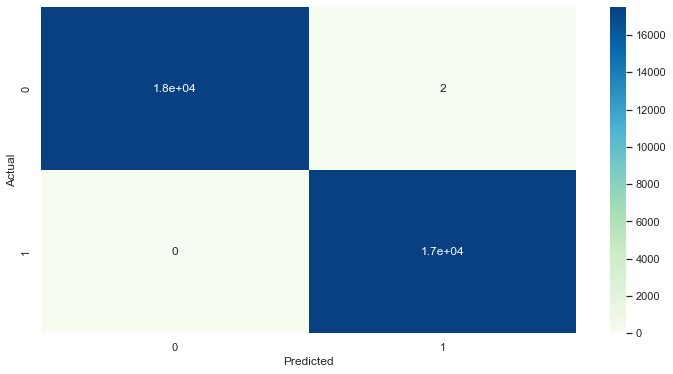

In [31]:
cm=confusion_matrix(y_test, dt_pred_test)
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "GnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [32]:
# confusion matrix of Random Forest
confusion_matrix(y_test, rf_pred_test)

array([[17499,     3],
       [    0, 17460]], dtype=int64)

Text(84.5, 0.5, 'Actual')

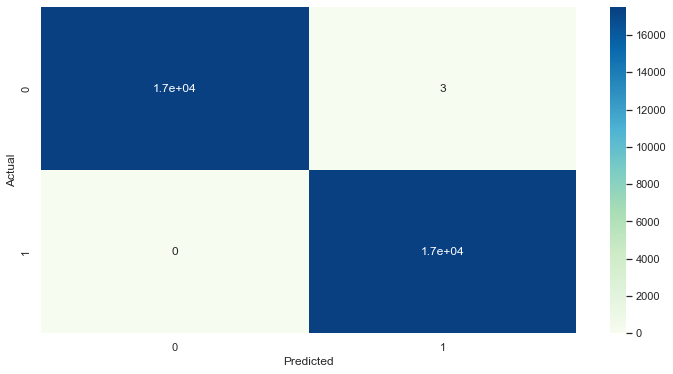

In [33]:
cm=confusion_matrix(y_test, rf_pred_test)
plt.figure(figsize = (12, 6))

sns.heatmap(cm, annot = True, cmap = "GnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 4.2 Classification Report of Models

In [34]:
print("KNN Classifier : ")
print(classification_report(y_test, knn_pred_test) )
print()

print("Decision Tree Classifier : ")
print(classification_report(y_test, dt_pred_test) )
print()

print("Random Forest Tree Classifier : ")
print(classification_report(y_test, rf_pred_test))
print()

KNN Classifier : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962


Decision Tree Classifier : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962


Random Forest Tree Classifier : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17502
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00    

# 5.0 Deployment



In [35]:
x = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']].values
y = df['fraud'].values
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size = 0.2)

finalModel = dt
finalModel.fit(x_train,y_train)
y_predModel = finalModel.predict(x_test)

print("Accuracy Score : ", accuracy_score(y_predModel, y_test))

Accuracy Score :  1.0


In [36]:
def prediction(variable1, variable2,variable3, variable4,variable5, variable6,variable7):
    prediction = dt.predict([[variable1, variable2,variable3, variable4,variable5, variable6,variable7]])
    if prediction == 1:
        pred = 'Fraud'
    else:
        pred = 'Not fraud'
    return pred

In [37]:
def int_input(prompt):
    while True:
        try:
            validation = int(input(prompt))
            return validation
        except ValueError as e:
            print("Not a proper integer! Try it again")

def main():
    print('< Credit Card Fraud Detection >\n')
    
    distance_from_home = None
    
    while distance_from_home is None:
        try:
            distance_from_home = float(input("Enter distance from home: "))
        except ValueError:
            print ("HEY! '{}' is not a float!".format(distance_from_home))
            
    distance_from_last_transaction = None
    
    while distance_from_last_transaction is None:
        try:
            distance_from_last_transaction = float(input("Enter distance from last transaction: "))
        except ValueError:
            print ("HEY! '{}' is not a float!".format(distance_from_last_transaction))   
            
    current_price = None
    
    while current_price is None:
        try:
            current_price = float(input("Enter current purchase price: "))
        except ValueError:
            print ("HEY! '{}' is not a float!".format(current_price))
            
    median_price = None
    
    while median_price is None:
        try:
            median_price = float(input("Enter median price: "))
        except ValueError:
            print ("HEY! '{}' is not a float!".format(median_price))
            
    repeat_retailer = -1
    while repeat_retailer != 1 and repeat_retailer != 0:
        repeat_retailer = int_input("Is the transaction made to the repeated retailer? (yes=1,no=0): ")
        if repeat_retailer != 1 and repeat_retailer != 0:
            print("HEY! Please enter either 1 or 0!")
            
    used_chip = -1
    while used_chip != 1 and used_chip != 0:
        used_chip = int_input("Is the transaction made using physical credit card? (yes=1,no=0): ")
        if used_chip != 1 and used_chip != 0:
            print("HEY! Please enter either 1 or 0!")
            
    used_pin_number = -1
    while used_pin_number != 1 and used_pin_number != 0:
        used_pin_number = int_input("Is the transaction made using pin number? (yes=1,no=0): ")
        if used_pin_number != 1 and used_pin_number != 0:
            print("HEY! Please enter either 1 or 0!")
    
    is_online = -1
    while is_online != 1 and is_online != 0:
        is_online = int_input("Is the transaction made online? (yes=1,no=0): ")
        if is_online != 1 and is_online != 0:
            print("HEY! Please enter either 1 or 0!")
    
    result = prediction(distance_from_home, distance_from_last_transaction, 
                        current_price / median_price, repeat_retailer, used_chip, 
                        used_pin_number, is_online)
    
    print("\nPredicted result:", result)
    

In [38]:
main()

< Credit Card Fraud Detection >

Enter distance from home: 10
Enter distance from last transaction: 10
Enter current purchase price: 100
Enter median price: 10000
Is the transaction made to the repeated retailer? (yes=1,no=0): 1
Is the transaction made using physical credit card? (yes=1,no=0): 1
Is the transaction made using pin number? (yes=1,no=0): 0
Is the transaction made online? (yes=1,no=0): 1

Predicted result: Not fraud
